 ### DATASET FROM 
<http://www.escience.cn/people/JunweiHan/NWPU-RESISC45.html>

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import re
import pandas as pd

from matplotlib import patches
from PIL import Image

In [56]:
# NWPU-RESISC45 Air Plane Dataset
ROOT_DIR = os.path.abspath('./')
DATA_ROOT = os.path.abspath('./data/air_planes')
ANN_DIR = os.path.join(DATA_ROOT, 'annotations/')
IMG_DIR = os.path.join(DATA_ROOT, 'images')

In [57]:
# Display Dataset Structure
%cd $DATA_ROOT
!tree --dirsfirst --filelimit 10
%cd $ROOT_DIR

/media/jihunjung/LocalDisk/JihunJung/02_work/02_Satellite_image_processing/DATASET/NWPU-RESISC45/air_planes
.
├── annotations [733 entries exceeds filelimit, not opening dir]
└── images [733 entries exceeds filelimit, not opening dir]

2 directories, 0 files
/home/jihunjung/deeplearning_research/research_note/object_detection/RCNN


In [196]:
def DrawImage(img_files, gt_bboxes = [], cols=5, rows= 5):
    fig = plt.figure(figsize=(10, 10))

    for i, img_file in enumerate(img_files):
        ax = plt.subplot(rows, cols,i+1)
        
        if len(gt_bboxes) != 0:
            for bbox in gt_bboxes[i]:
                x1, y1, x2, y2 = bbox
                p = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, alpha=1.0, linestyle="solid", edgecolor='blue', facecolor='none')
                ax.add_patch(p)
            
        img = Image.open(os.path.join(img_path, img_file))
        plt.axis('off')
        plt.imshow(img)
    plt.tight_layout()


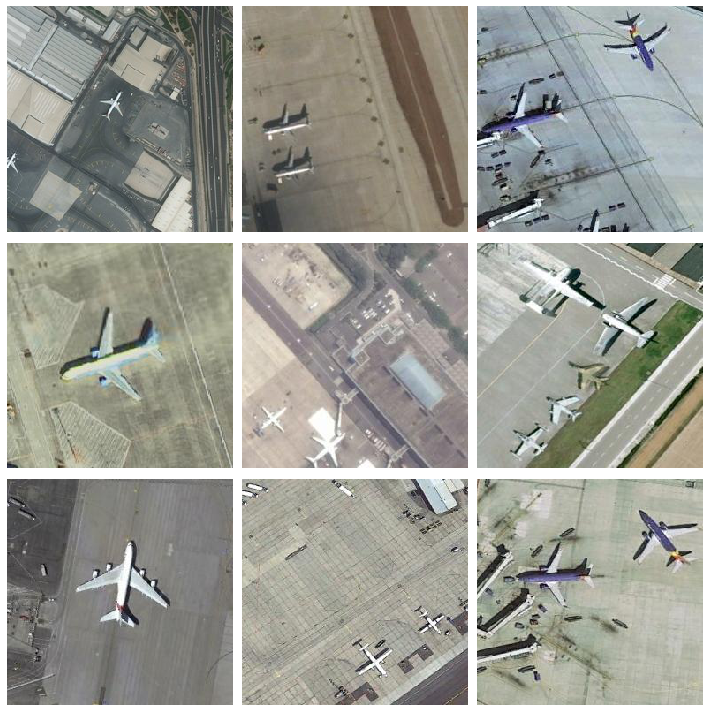

In [197]:
# Display Sample Images
img_path = os.path.join(DATA_ROOT, IMG_DIR)
img_list = os.listdir(img_path)
img_files = random.sample(img_list, 9)
DrawImage(img_files, cols=3, rows=3)

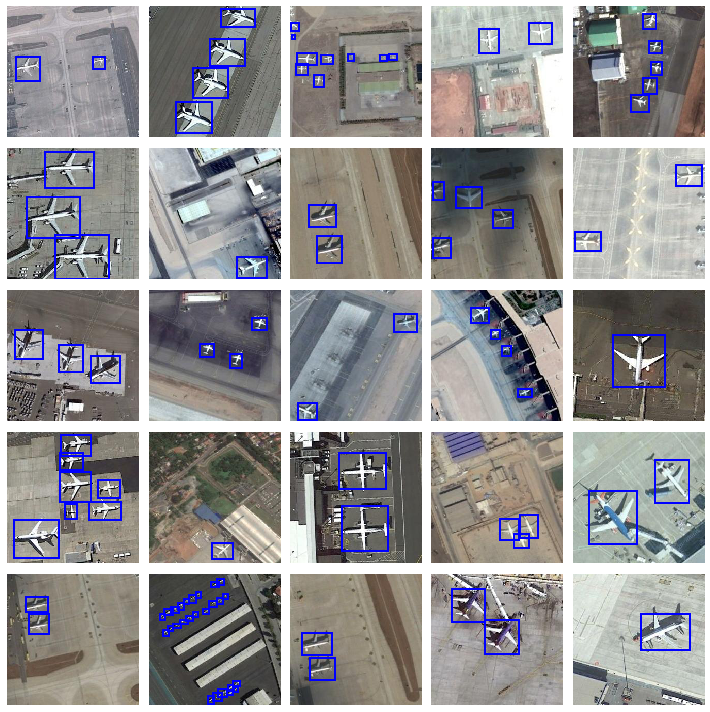

In [199]:
# Parsing Ground Truth Bounding Box
ann_path = os.path.join(DATA_ROOT, ANN_DIR)
ann_list = os.listdir(ann_path)
ann_files = random.sample(ann_list, 25)

gt_bboxes = []
img_files = []

for ann_file in ann_files:
    data = pd.read_csv(os.path.join(ann_path, ann_file))
    gt_bbox = np.array([], dtype=np.int32).reshape(0, 4)

    for row in data.iterrows():
        line = row[1][0].split(" ")
        x1 = int(line[0])
        y1 = int(line[1])
        x2 = int(line[2])
        y2 = int(line[3])
        gt_bbox = np.vstack([gt_bbox, [x1, y1, x2, y2]])
    gt_bboxes.append(gt_bbox)
    img_files.append('{}.jpg'.format(os.path.splitext(ann_file)[0]))

DrawImage(img_files, gt_bboxes)